# Decision Tree
![](title_pict/decision_tree2.png)

- It consists of a ordered hierarchy of if/else questions.
- Decision trees can be used for both [classification](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and [regression](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) tasks.
- The model predicts the value of an output (target variable) by answering these if/else questions.
- Each question splits the samples into two subsamples.
- The goal is to find the smallest tree that fits the data. In other words, asking as few questions as possible.
- If a feature is a continuous variable, the questions involve determining whether the feature value is less than or equal to a specific number, known as the threshold.
- The decision tree algorithm determines the questions based on the feature and the threshold when dealing with continuous variables.
- The initial node is referred to as the root, while a terminal node is called a leaf.

![](pict/decision_tree.jpeg)

## Decision Tree Classifier

In [36]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [40]:
dt.score(X_train, y_train)

1.0

In [41]:
dt.score(X_test, y_test)

0.8811188811188811

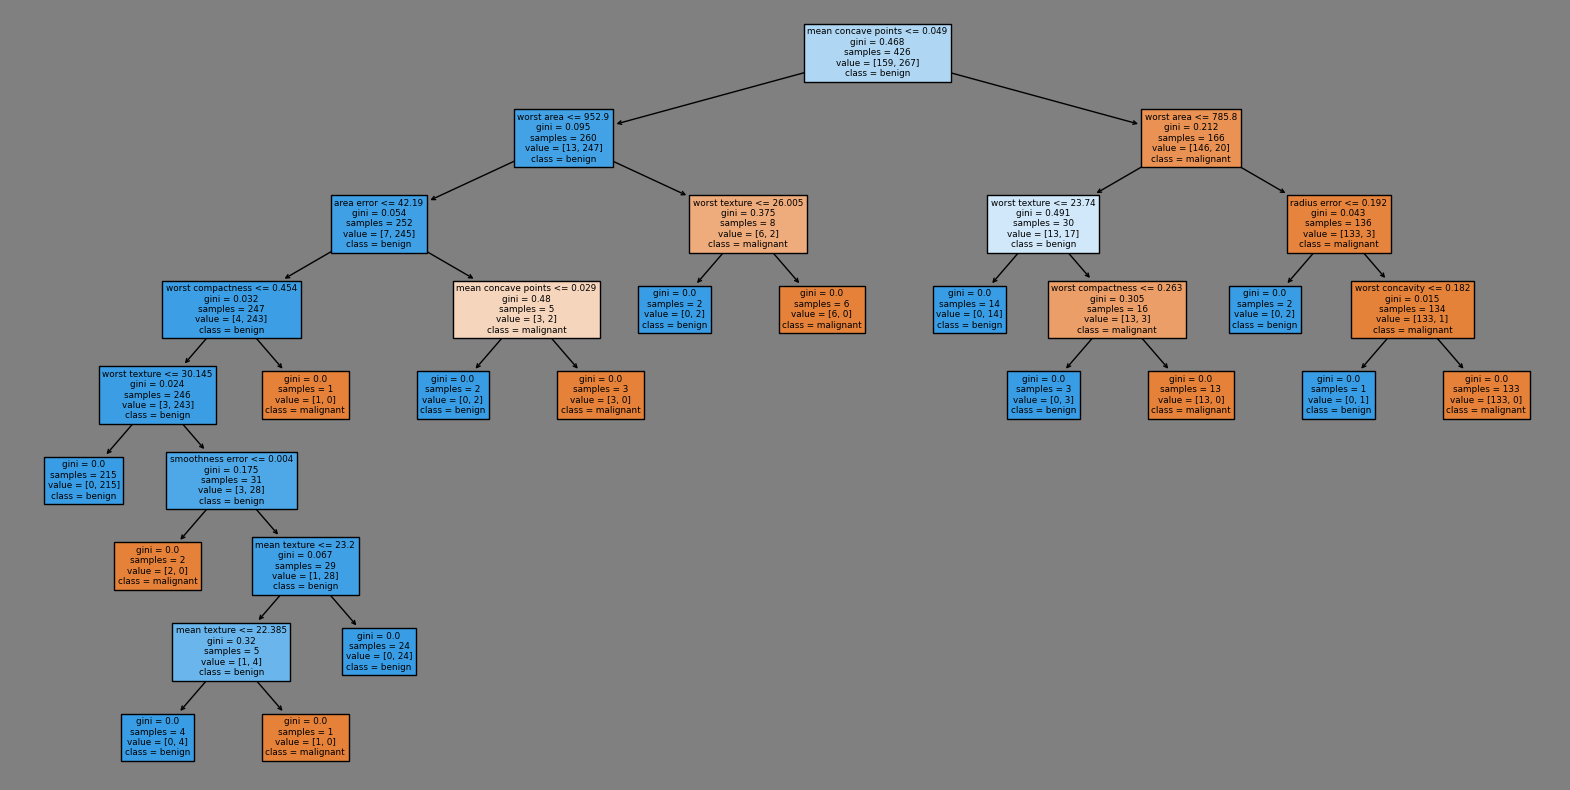

In [42]:
# sketch the tree
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10), facecolor='gray')

tree.plot_tree(dt, filled=True, class_names=load_breast_cancer().target_names, feature_names=load_breast_cancer().feature_names, ax=ax);

### max_depth

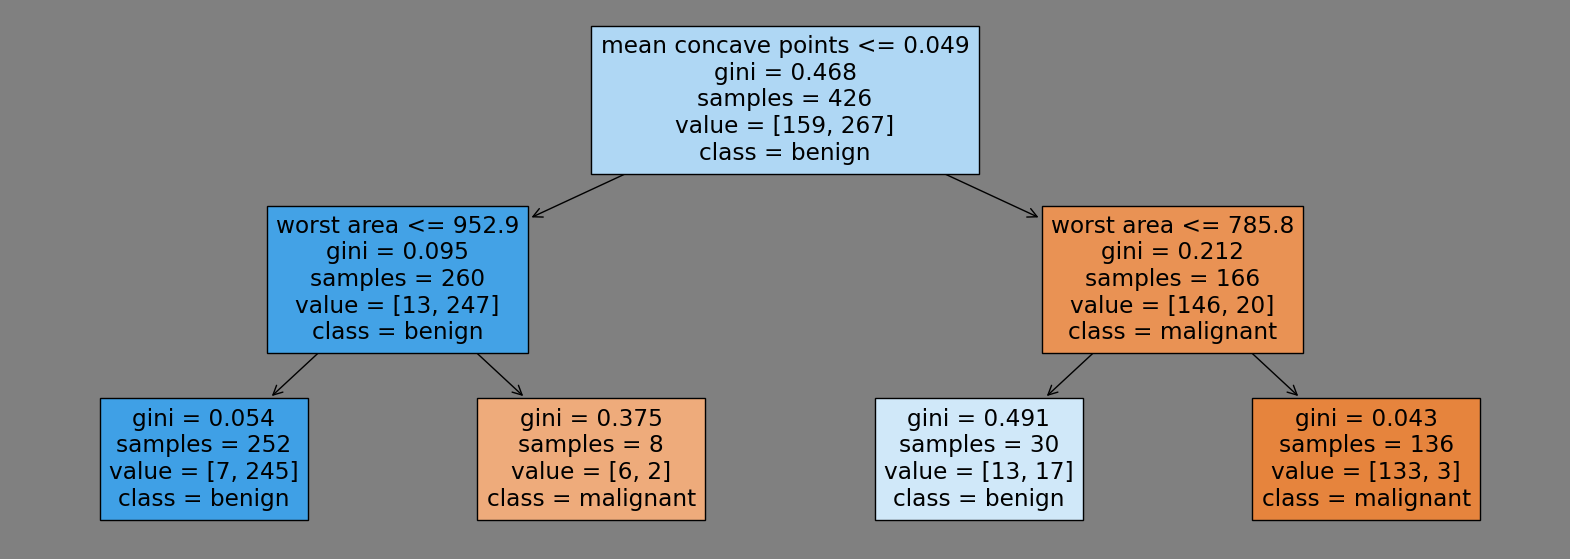

In [43]:
dt = DecisionTreeClassifier(max_depth=2, random_state=0)
dt.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(20,7), facecolor='gray')
tree.plot_tree(dt, filled=True, class_names=load_breast_cancer().target_names, feature_names=load_breast_cancer().feature_names, ax=ax);

### Gini Impurity
In classification tasks, Gini Impurity is used to select the questions in the decision tree.
- The Gini Impurity $G$ is calculated using the formula: 
 $G = 1- \sum p_i^2$, where $p_i$ represents the probability of each class in the node.

- The question that minimizes the Gini Impurity is chosen.

- For the node in the bottom left corner above, the Gini Impurity is calculated as follows and the output is 0.054:

 ``` python
round(1-(7/252)**2-(245/252)**2,  3)
```

In regression tasks, the mean squared error (MSE) is used instead of Gini Impurity.

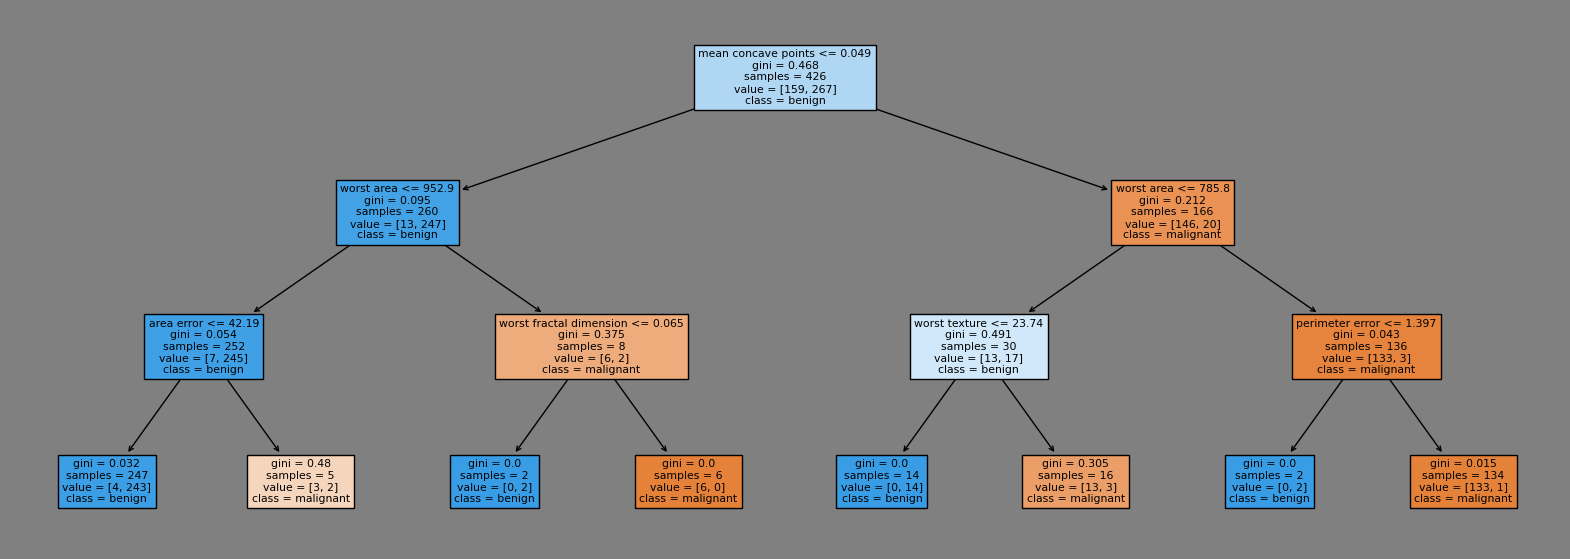

In [44]:
dt = DecisionTreeClassifier(max_depth=3, random_state=0)
dt.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(20,7), facecolor='gray')

tree.plot_tree(dt, filled=True, class_names=load_breast_cancer().target_names, feature_names=load_breast_cancer().feature_names, ax=ax);

In [45]:
for md in [2, 4, 6, 8, 10]:
    dt = DecisionTreeClassifier(max_depth=md, random_state=0)
    dt.fit(X_train, y_train)
    print(f'Max Depth: {md} --- Training Score: {dt.score(X_train, y_train):.2f} --- Test Score: {dt.score(X_test, y_test):.2f}')

Max Depth: 2 --- Training Score: 0.94 --- Test Score: 0.94
Max Depth: 4 --- Training Score: 0.99 --- Test Score: 0.90
Max Depth: 6 --- Training Score: 1.00 --- Test Score: 0.92
Max Depth: 8 --- Training Score: 1.00 --- Test Score: 0.88
Max Depth: 10 --- Training Score: 1.00 --- Test Score: 0.88


### Feature Importances
The *feature_importances_* attribute returns the significance of each feature in building the model using the Decision Tree algorithm.
- The sum of the importances for all features equals 1.

In [46]:
dt.feature_importances_

array([0.        , 0.0096886 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.71160121, 0.        , 0.        ,
       0.01948008, 0.        , 0.        , 0.01676117, 0.017502  ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06706044, 0.        , 0.11373562, 0.        ,
       0.03421113, 0.00995974, 0.        , 0.        , 0.        ])

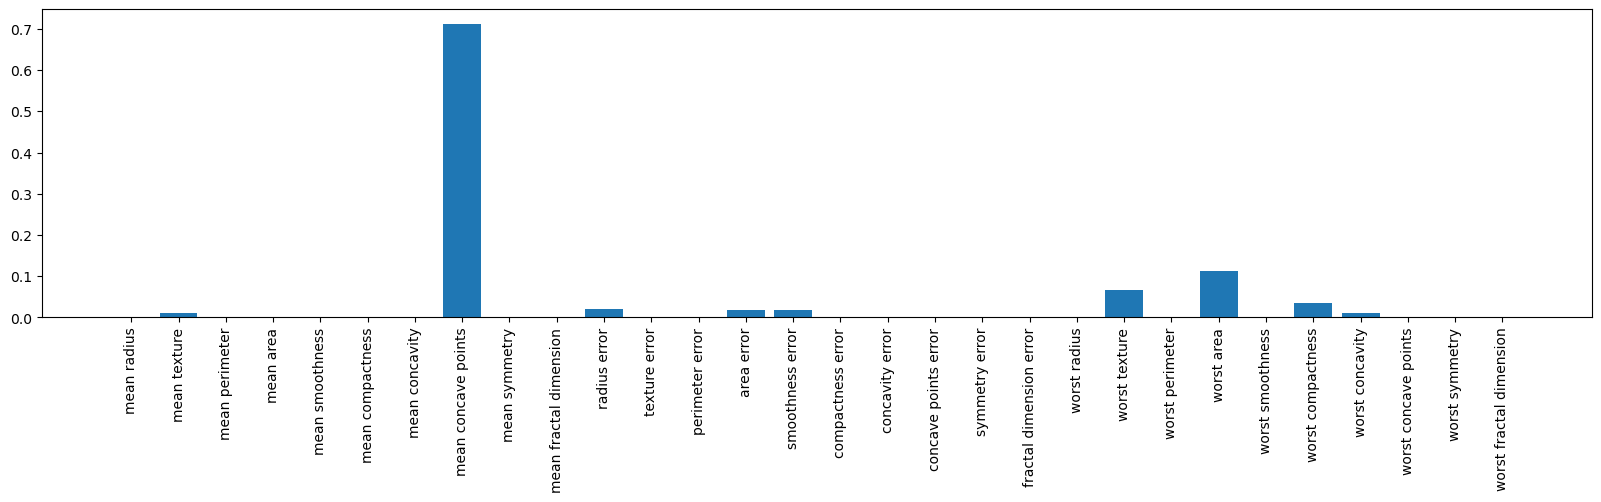

In [47]:
plt.figure(figsize=(20,4))
plt.bar(load_breast_cancer().feature_names, dt.feature_importances_)
plt.xticks(rotation=90);

## Decision Tree Regressor

In [48]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [52]:
dt.score(X_train, y_train)

1.0

In [53]:
dt.score(X_test, y_test)

0.5859590482097172

### max_depth

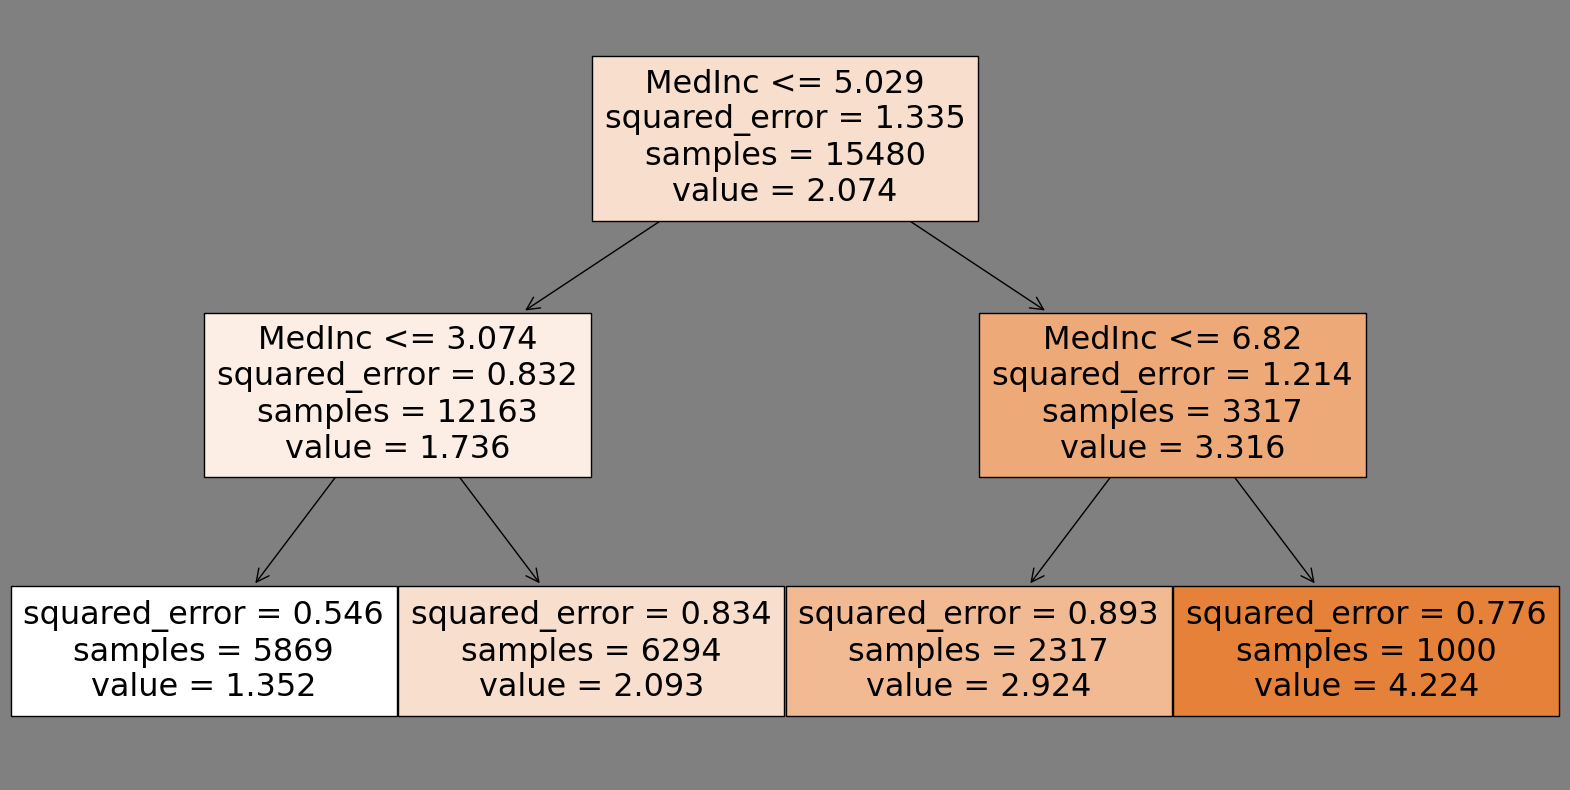

In [54]:
dt = DecisionTreeRegressor(max_depth=2, random_state=0)
dt.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(20,10), facecolor='gray')
tree.plot_tree(dt, filled=True, feature_names=fetch_california_housing().feature_names, ax=ax);

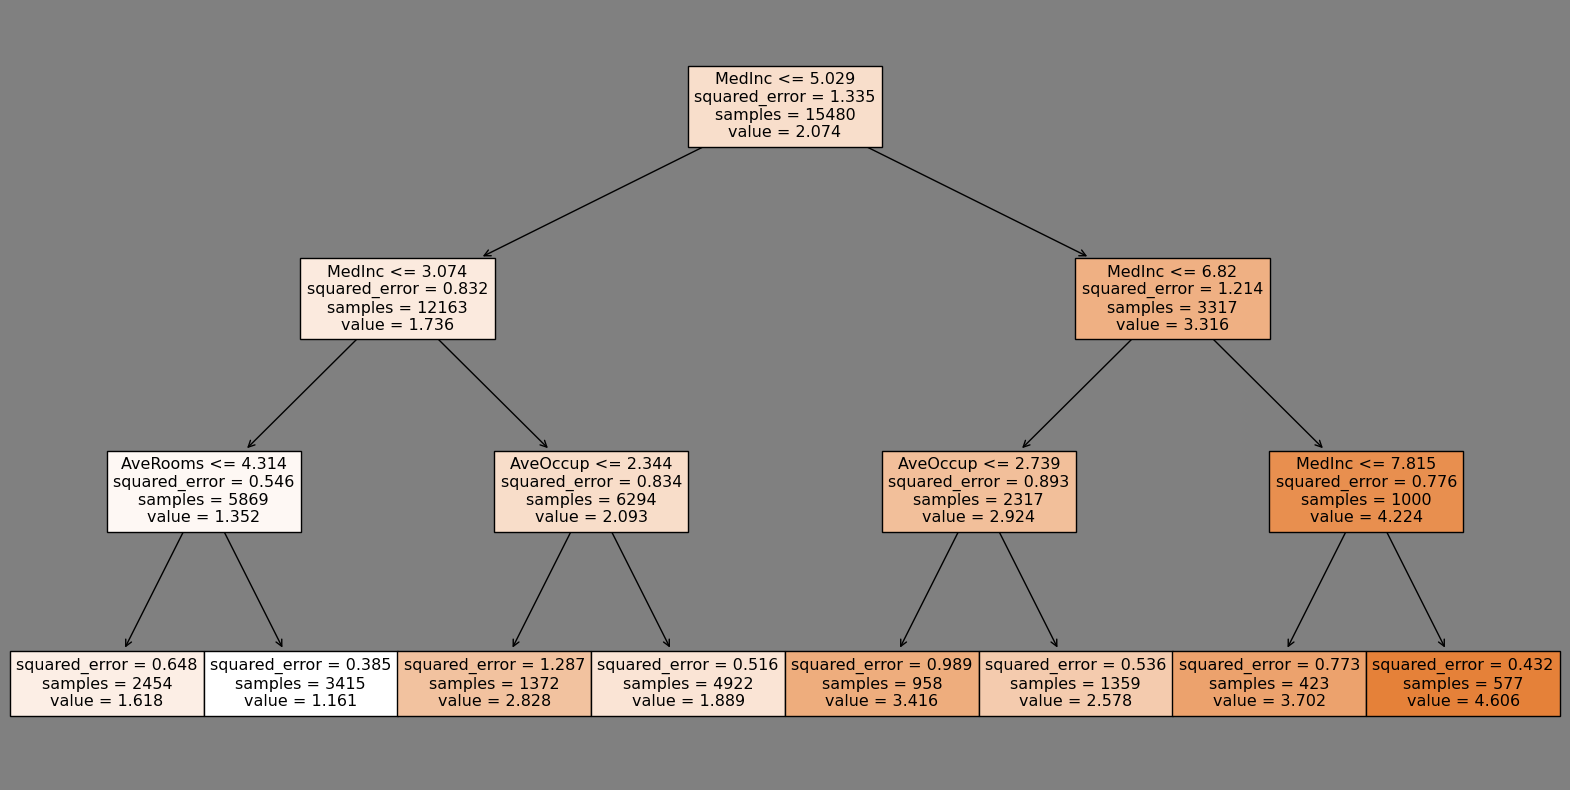

In [55]:
dt = DecisionTreeRegressor(max_depth=3, random_state=0)
dt.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(20,10), facecolor='gray')
tree.plot_tree(dt, filled=True, feature_names=fetch_california_housing().feature_names, ax=ax);

In [56]:
for md in [2, 4, 6, 7, 8, 10, 12, 14, 16, 18, 20]:
    dt = DecisionTreeRegressor(max_depth=md, random_state=0)
    dt.fit(X_train, y_train)
    print(f'Max Depth: {md} --- Training Score: {dt.score(X_train, y_train):.2f} --- Test Score: {dt.score(X_test, y_test):.2f}')

Max Depth: 2 --- Training Score: 0.45 --- Test Score: 0.43
Max Depth: 4 --- Training Score: 0.59 --- Test Score: 0.55
Max Depth: 6 --- Training Score: 0.68 --- Test Score: 0.62
Max Depth: 7 --- Training Score: 0.71 --- Test Score: 0.65
Max Depth: 8 --- Training Score: 0.76 --- Test Score: 0.67
Max Depth: 10 --- Training Score: 0.84 --- Test Score: 0.68
Max Depth: 12 --- Training Score: 0.90 --- Test Score: 0.65
Max Depth: 14 --- Training Score: 0.95 --- Test Score: 0.62
Max Depth: 16 --- Training Score: 0.98 --- Test Score: 0.60
Max Depth: 18 --- Training Score: 0.99 --- Test Score: 0.59
Max Depth: 20 --- Training Score: 1.00 --- Test Score: 0.59


### Feature Importances

In [23]:
dt.feature_importances_

array([0.85351699, 0.        , 0.02663263, 0.        , 0.        ,
       0.11985038, 0.        , 0.        ])

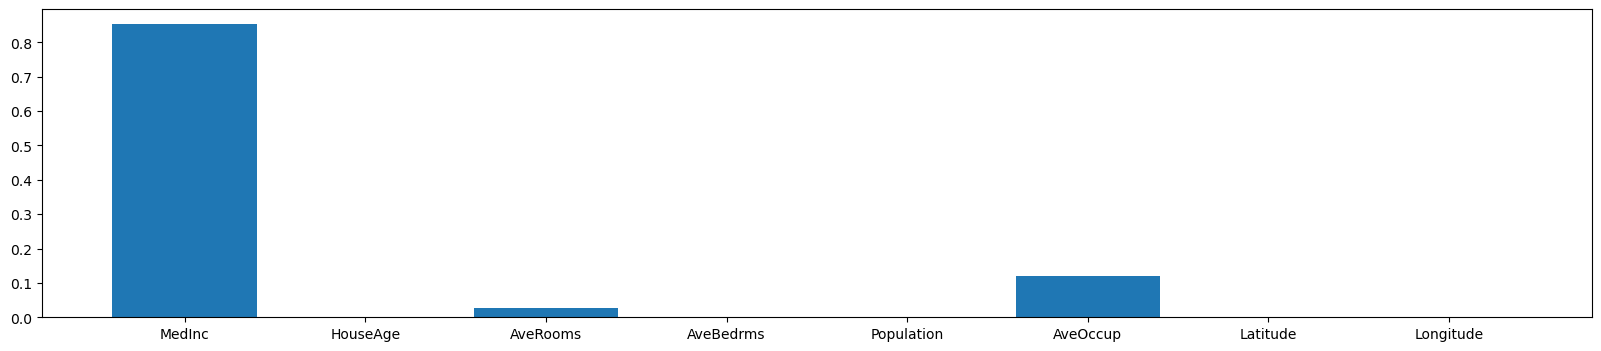

In [24]:
plt.figure(figsize=(20,4))
plt.bar(fetch_california_housing().feature_names, dt.feature_importances_);